## Brief GGPLOT Tutorial

N=1,144 participants were contacted. Most respondents were contacted by email, a smaller sample was contacted by phone. The phone interviews did not come with gender and age. 

This notebook briefly explains a few examples -- ggplot is a flexible tool. There are many, many plots one could generate. 


In [37]:
library(dplyr)
library(survey)  
library(mice) 
library(reshape2)
rm(list=ls())
load("~/Desktop/APL Survey/cleaned_data.rda")
ls()

[1] "clean_data"

## Some predictions, a simulation, and a joy plot


In [38]:
clean_data$no_mask<-recode(clean_data$wear_mask, `1`=1, `2`=1, `3`=0, `4`=0, `5`=0)
print("Unweighted distribution of non-mask:")
table(clean_data$no_mask)
print("Logit Model")
glm(no_mask~as.factor(pid3), clean_data, family=binomial("logit")) %>% summary()
##Let's predict the probality for Dems, Reps, and Independents.
model<-glm(no_mask~as.factor(pid3), clean_data, family=binomial("logit"))
## Generate a matrix for your IV. Here is Dem - I'm multiplying the coefficient matrix
## by a 1,0,0 vector. Why, there are 3 parameters in the model, can't multiply the vectors
## if they are a different size
print("Predictions, Democrat, Independent, Republican")
coef(model) %*% c(1, 0, 0) %>% plogis() ### Pr(non wearer|Dem)
coef(model) %*% c(1, 1, 0) %>% plogis() ### Pr(non wearer|I)
coef(model) %*% c(1, 0, 1) %>% plogis() ### Pr(non wearer|Rep)

### Now let's simulate uncertainty
cov_b_matrix<-vcov(model)

## Covariance matrix of parameters
cov_b_matrix
sim_b<-MASS::mvrnorm(1000, coef(model), cov_b_matrix)
dim(sim_b)
x_sim=rbind(c(1,0,0),
                c(1,1,0),
                c(1,0,1))
print("The design matrix")
x_sim
post_dat<-x_sim %*% t(sim_b) %>% plogis() 
print("There are three rows and 1000 columns. Let's just transpose this")
dim(post_dat)
post_dat<-data.frame(t(post_dat))
head(post_dat)
## Each column represents 1000 simulations of a pr(y=1) for each party
library(ggplot2)
names(post_dat)<-c("Democrat", "Independent", "Republican")

[1] "Unweighted distribution of non-mask:"



   0    1 
1071   73 

[1] "Logit Model"



Call:
glm(formula = no_mask ~ as.factor(pid3), family = binomial("logit"), 
    data = clean_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.4616  -0.4616  -0.3760  -0.1420   3.0337  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -4.5917     0.5803  -7.913 2.51e-15 ***
as.factor(pid3)Independent   1.9775     0.6085   3.250  0.00115 ** 
as.factor(pid3)Republican    2.4063     0.6050   3.978 6.96e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 543.01  on 1143  degrees of freedom
Residual deviance: 513.39  on 1141  degrees of freedom
AIC: 519.39

Number of Fisher Scoring iterations: 7


[1] "Predictions, Democrat, Independent, Republican"


0.01003344


0.06823028


0.1010638


,(Intercept),as.factor(pid3)Independent,as.factor(pid3)Republican
(Intercept),0.3367064,-0.3367064,-0.3367064
as.factor(pid3)Independent,-0.3367064,0.3702447,0.3367064
as.factor(pid3)Republican,-0.3367064,0.3367064,0.3659808


[1] 1000    3

[1] "The design matrix"


1,0,0
1,1,0
1,0,1


[1] "There are three rows and 1000 columns. Let's just transpose this"


[1]    3 1000

X1,X2,X3
0.008299286,0.06545675,0.09565691
0.007820938,0.05720409,0.11788760
0.006851900,0.06298286,0.08924778
0.006562562,0.08962672,0.09653264
0.004856265,0.09141793,0.09289738
0.022913647,0.05141562,0.09464817


## The Joy Plot

Democrat,Independent,Republican,id
0.008299286,0.06545675,0.09565691,1
0.007820938,0.05720409,0.11788760,2
0.006851900,0.06298286,0.08924778,3
0.006562562,0.08962672,0.09653264,4
0.004856265,0.09141793,0.09289738,5
0.022913647,0.05141562,0.09464817,6


[1] 0.01200418

[1] 0.06920732

[1] 0.1015669

id,variable,value
1,Democrat,0.008299286
2,Democrat,0.007820938
3,Democrat,0.006851900
4,Democrat,0.006562562
5,Democrat,0.004856265
6,Democrat,0.022913647


Picking joint bandwidth of 0.00255


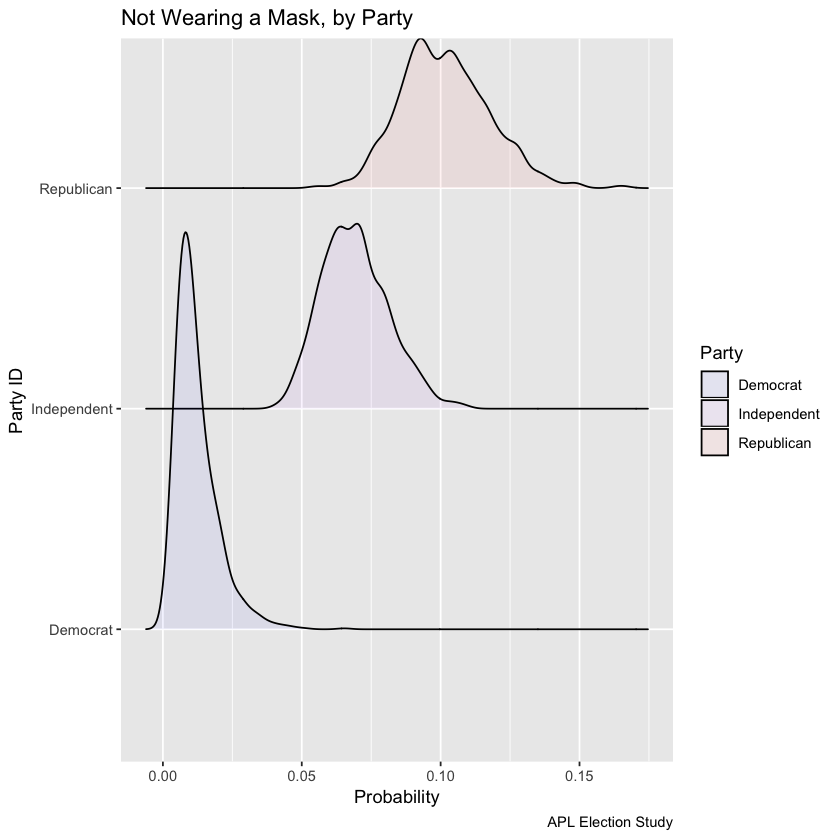

In [39]:
library(ggplot2)
library(ggridges)
post_dat$id<-seq(1:nrow(post_dat))
head(post_dat)
mean(post_dat[,1])
mean(post_dat[,2])
mean(post_dat[,3])
plot_dat<-post_dat %>% melt(id="id")
head(plot_dat)
# Joy Plot:
ggplot(data=plot_dat, aes(y=as.factor(variable),
                          x=value, fill=as.factor(variable))) +
  geom_density_ridges(alpha=0.05) +
  scale_fill_manual(name="Party", values=c("blue", "purple", "red"))+
  labs(title="Not Wearing a Mask, by Party",
       caption="APL Election Study")+
   xlab("Probability")+
   ylab("Party ID")

  



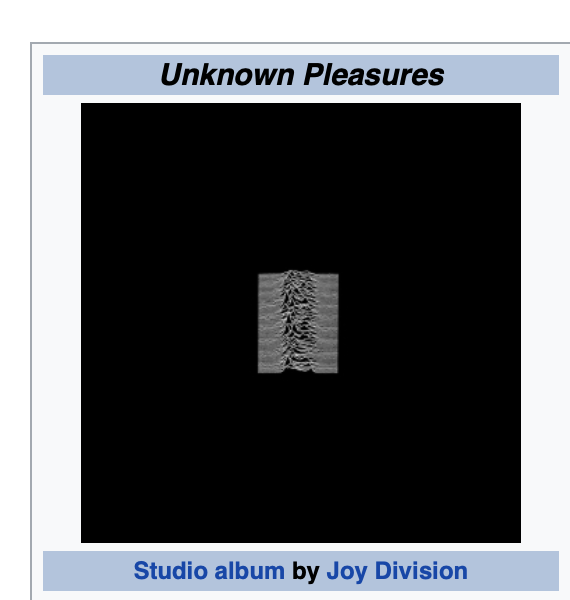

Source:Wikipedia


Call:
lm(formula = rep_ft ~ as.factor(pid3), data = clean_data)

Residuals:
   Min     1Q Median     3Q    Max 
-71.66 -14.83   3.34  18.34  85.17 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  14.833      1.615   9.185   <2e-16 ***
as.factor(pid3)Independent   23.837      2.066  11.535   <2e-16 ***
as.factor(pid3)Republican    56.827      2.164  26.264   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.92 on 1141 degrees of freedom
Multiple R-squared:  0.3841,	Adjusted R-squared:  0.383 
F-statistic: 355.7 on 2 and 1141 DF,  p-value: < 2.2e-16


[1] "The FT score for Dems :"


14.83278


[1] "The FT score for Independent :"


38.66951


[1] "The FT score for Reps :"


71.65957


scores,PID
14.83278,Democrat
38.66951,Independent
71.65957,Republican


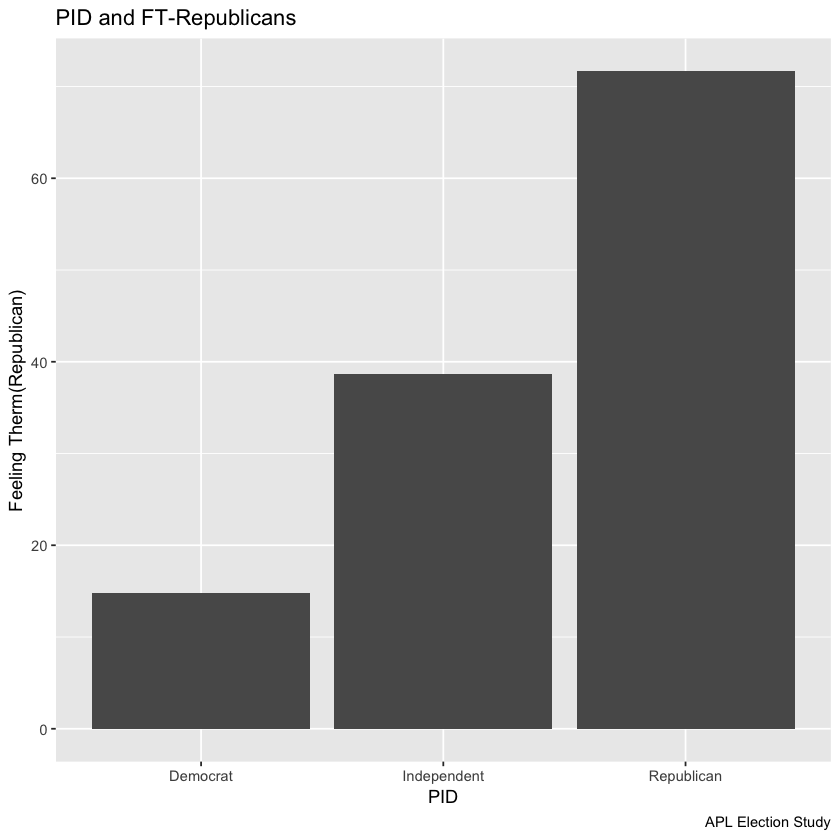

In [41]:
### let's do a linear regression
lm(rep_ft~as.factor(pid3), clean_data) %>% summary()
model<-lm(rep_ft~as.factor(pid3)+as.factor(pid3), clean_data)
print("The FT score for Dems :")
coef(model) %*% c(1, 0, 0)   ### Mean for Dem
print("The FT score for Independent :")
coef(model) %*% c(1, 1, 0)   ### I
print("The FT score for Reps :")
coef(model) %*% c(1, 0, 1)  ### Rep

### Now let's simulate uncertainty
data_matrix<-data.frame(scores=
             c(coef(model) %*% c(1, 0, 0),
               coef(model) %*% c(1, 1, 0) ,
               coef(model) %*% c(1, 0, 1)),
             PID=c("Democrat", "Independent", "Republican"))

data_matrix


ggplot(data=data_matrix, aes(x=as.factor(PID), y=scores)) +
  geom_bar(stat="identity") +
  labs(title="PID and FT-Republicans",
       caption="APL Election Study")+
   xlab("PID")+
   ylab("Feeling Therm(Republican)")



